In [1]:
import geopandas as gpd
import pandas as pd
import shapely

In [2]:
district_plan = {1: {547,550}, 2: {552,1243}, 3: {693,532}}
district_plan_mask = {547, 550, 552, 1243, 693, 532}
arizona = gpd.read_file('data/Arizona/arizonaGeo.json')

,index,precinct,demVotes,repVotes,totalVotes,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop,district,geometry
532,532,longbow,725,1654,2379,3692,63,2828,476,93,38,1,"POLYGON ((-111.73563 33.48525, -111.73566 33.4..."
547,547,scudder,2071,1269,3340,5675,264,3726,935,289,124,4,"POLYGON ((-111.91125 33.36559, -111.91124 33.3..."
550,550,hollis,1711,796,2507,5126,299,3039,1009,344,111,4,"POLYGON ((-111.92007 33.37832, -111.92662 33.3..."
552,552,cairo,1649,655,2304,4440,121,2832,758,373,68,4,"POLYGON ((-111.92633 33.39298, -111.93491 33.3..."
693,693,rio salado,2382,848,3230,10021,738,5367,2196,805,318,4,"POLYGON ((-111.94277 33.43573, -111.94244 33.4..."
1243,1243,ardmore,2393,806,3199,6710,971,1709,3497,193,86,3,"POLYGON ((-112.04735 33.37774, -112.04735 33.3..."


<AxesSubplot: >

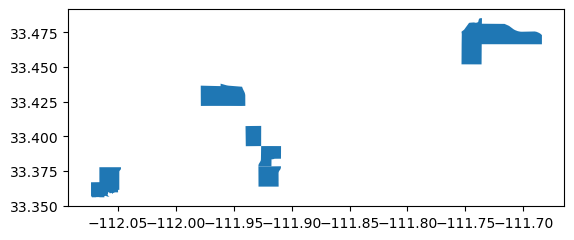

In [3]:
arizona = arizona[arizona['index'].isin(district_plan_mask)]
display(arizona)
display(arizona.plot())

In [4]:
def assignDistrict(precinct_id, district_plan):
    for district_id in district_plan:
        if(precinct_id in district_plan[district_id]):
            return district_id
    return 0

,geometry,demVotes,repVotes,totalVotes,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop
district,,,,,,,,,,
1,"POLYGON ((-111.91124 33.36376, -111.91991 33.3...",3782,2065,5847,10801,563,6765,1944,633,235
2,"MULTIPOLYGON (((-112.04735 33.37681, -112.0473...",4042,1461,5503,11150,1092,4541,4255,566,154
3,"MULTIPOLYGON (((-111.94244 33.43486, -111.9417...",3107,2502,5609,13713,801,8195,2672,898,356


<AxesSubplot: >

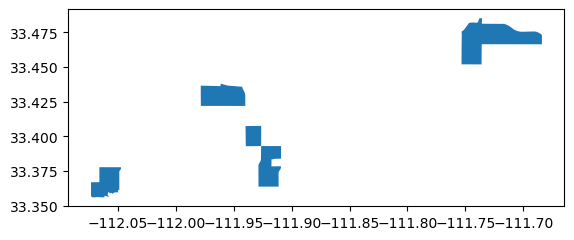

In [5]:
arizona['district'] = arizona['index'].apply(lambda precinct: assignDistrict(precinct, district_plan))
arizona.drop(["index", 'precinct'], axis = 1, inplace=True)
arizona = arizona.dissolve(by = 'district', aggfunc = 'sum')
display(arizona)
display(arizona.plot())